<a href="https://colab.research.google.com/github/ArpitaMallik/Insurance-Charge-Prediction-Model---Kaggle/blob/main/Insurance_Charge_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/medical_insurance.csv")
print(df.head())
df.describe()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
print(df["region"].value_counts())
print(df["children"].value_counts())

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64
0    1186
1     672
2     496
3     324
4      52
5      42
Name: children, dtype: int64


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.groupby("smoker").mean()
#df.groupby("sex").mean()
#df.groupby("children").mean()

<ipython-input-348-bde5a4cdd710>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("smoker").mean()


,age,bmi,children,charges
smoker,,,,
no,39.275362,30.665765,1.097826,8417.874411
yes,38.460993,30.840656,1.117021,32223.139764


<ipython-input-349-6ab3a4ed6d57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

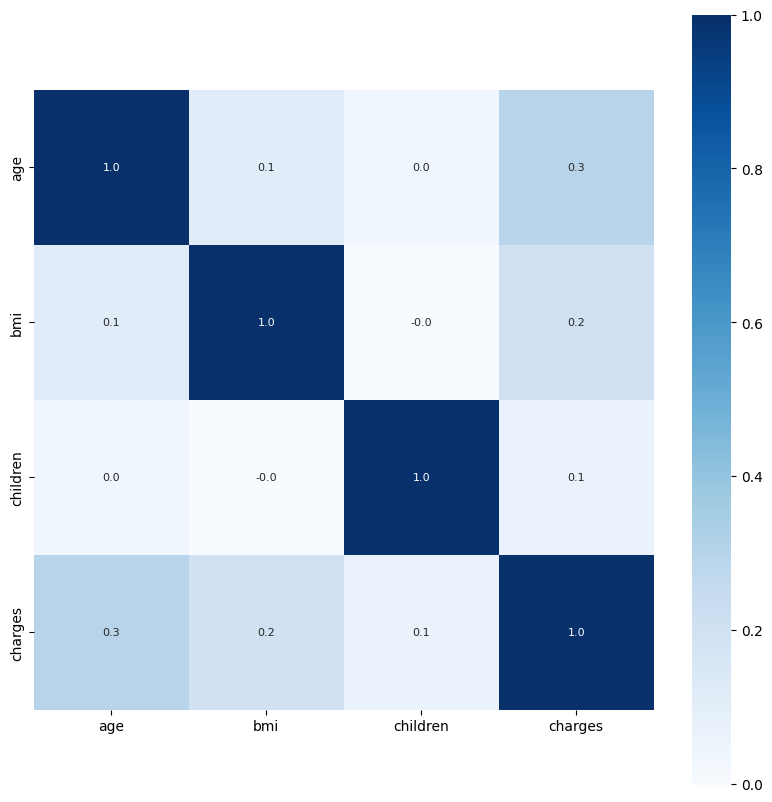

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size":8}, cmap="Blues")

<Axes: xlabel='smoker', ylabel='charges'>

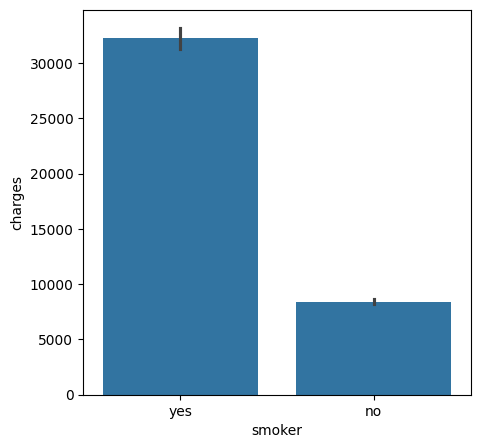

In [ ]:
#smoker vs charges
plot = plt.figure(figsize=(5,5))
sns.barplot(x="smoker", y="charges", data=df)

<Axes: xlabel='bmi', ylabel='charges'>

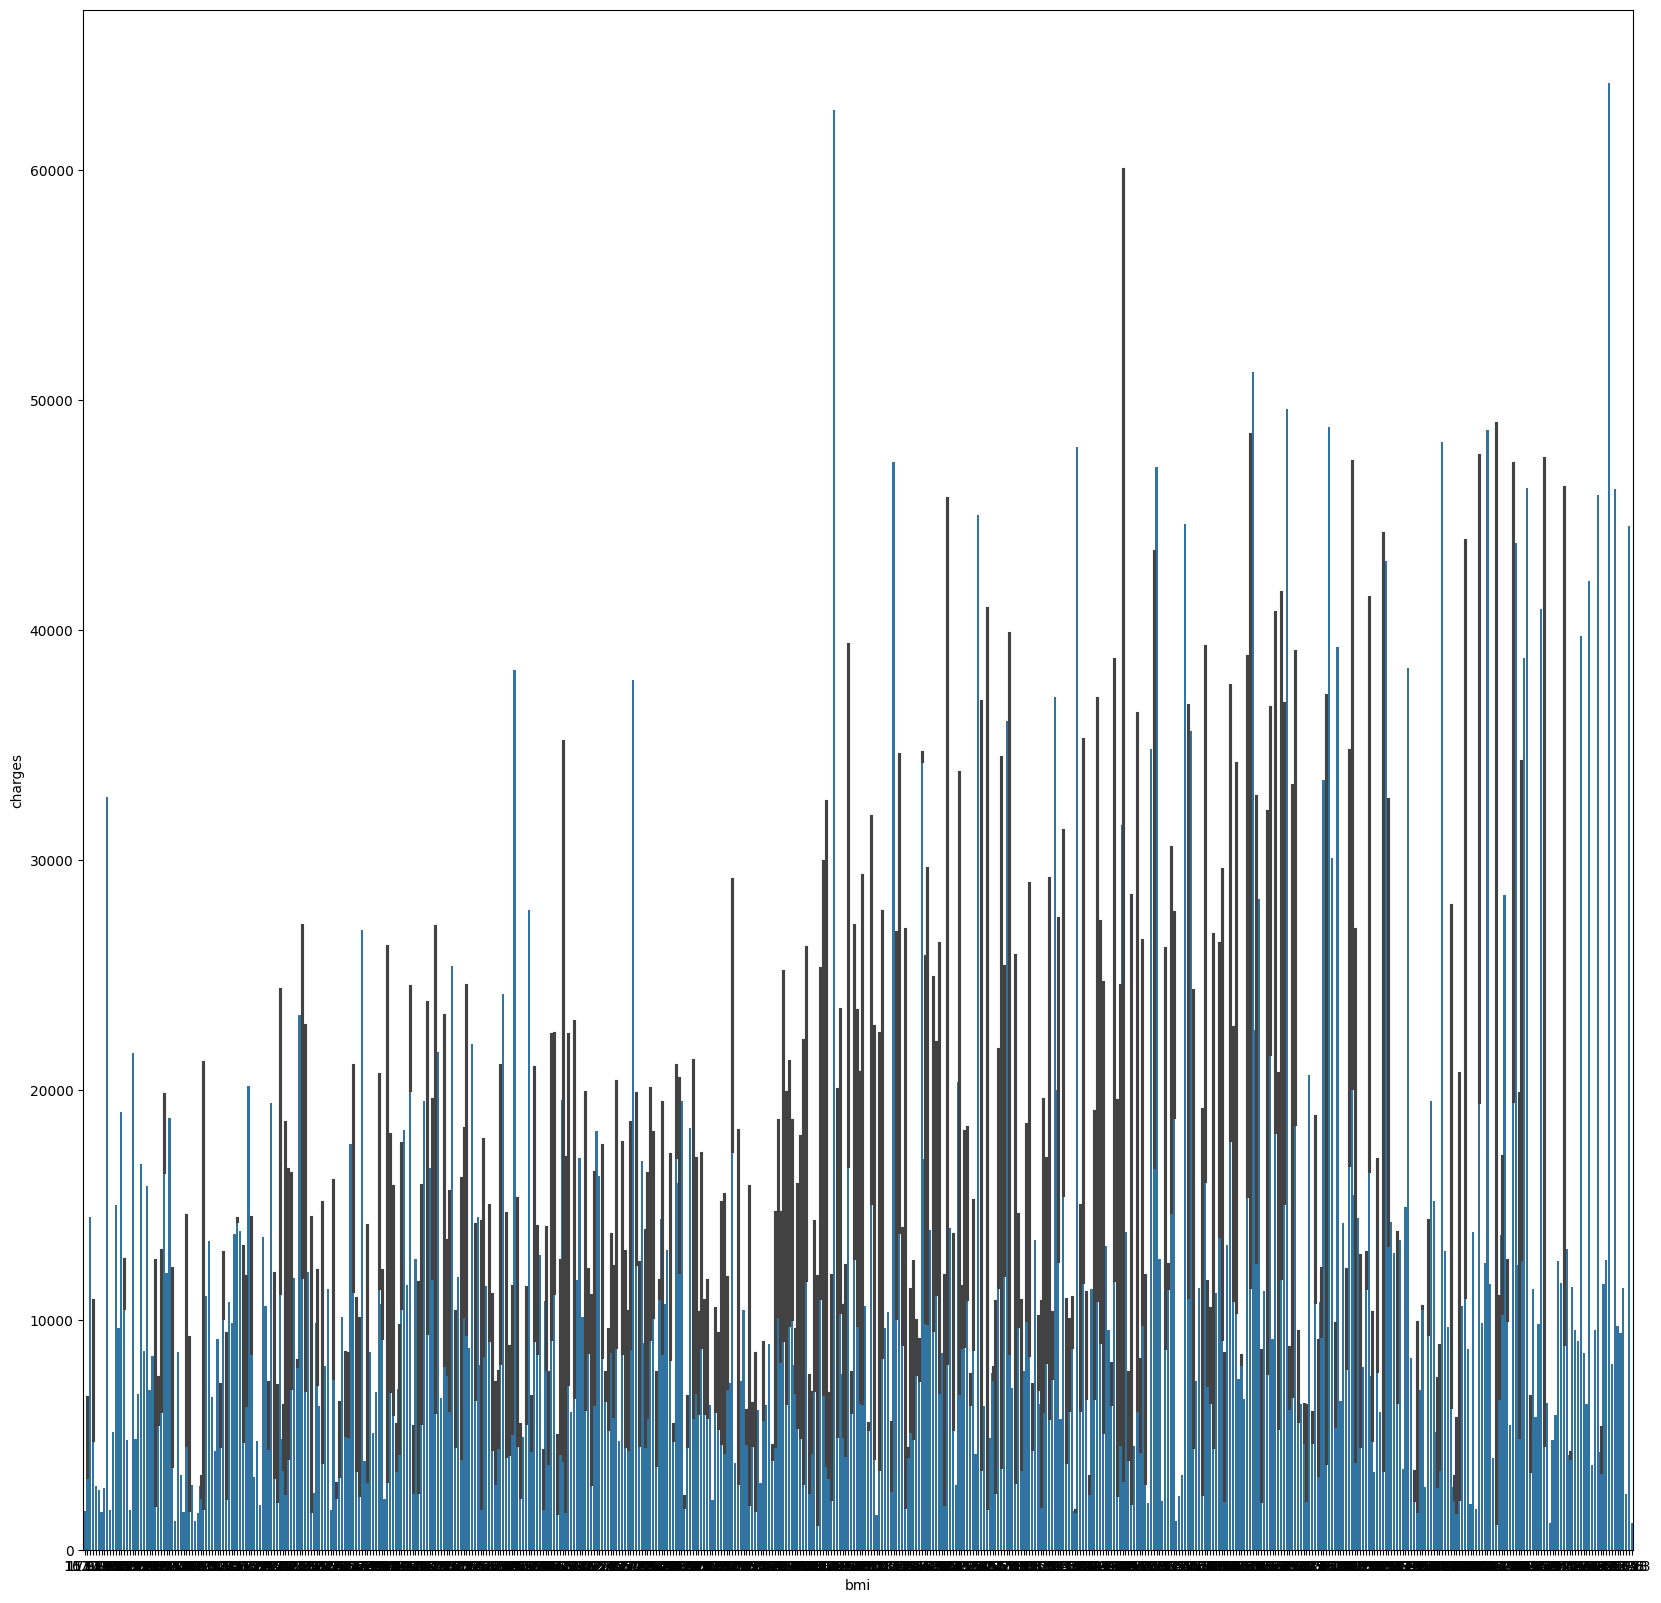

In [ ]:
plot = plt.figure(figsize=(20,20))
sns.barplot(x="bmi", y="charges", data=df)

<Axes: xlabel='region', ylabel='charges'>

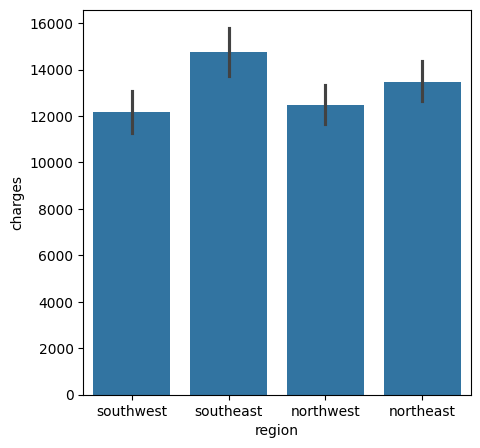

In [ ]:
#smoker vs charges
plot = plt.figure(figsize=(5,5))
sns.barplot(x="region", y="charges", data=df)

<Axes: xlabel='children', ylabel='charges'>

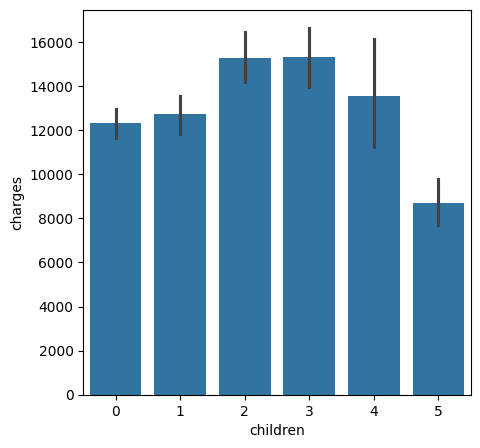

In [ ]:
#smoker vs charges
plot = plt.figure(figsize=(5,5))
sns.barplot(x="children", y="charges", data=df)

<Axes: xlabel='age', ylabel='charges'>

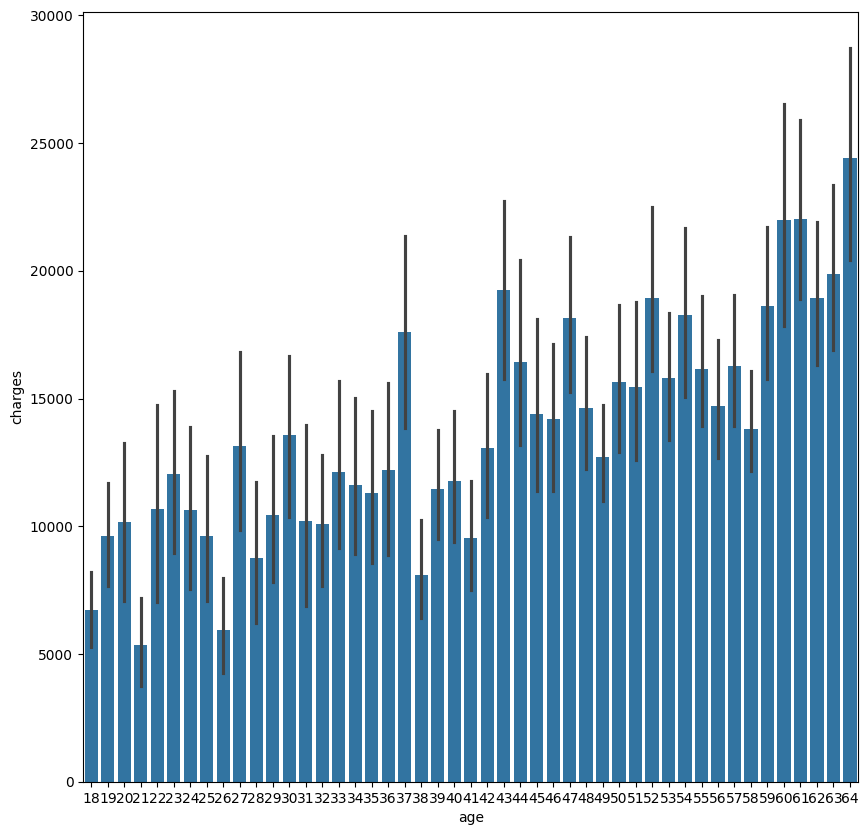

In [ ]:
plot = plt.figure(figsize=(10,10))
sns.barplot(x="age", y="charges", data=df)

<Axes: xlabel='sex', ylabel='charges'>

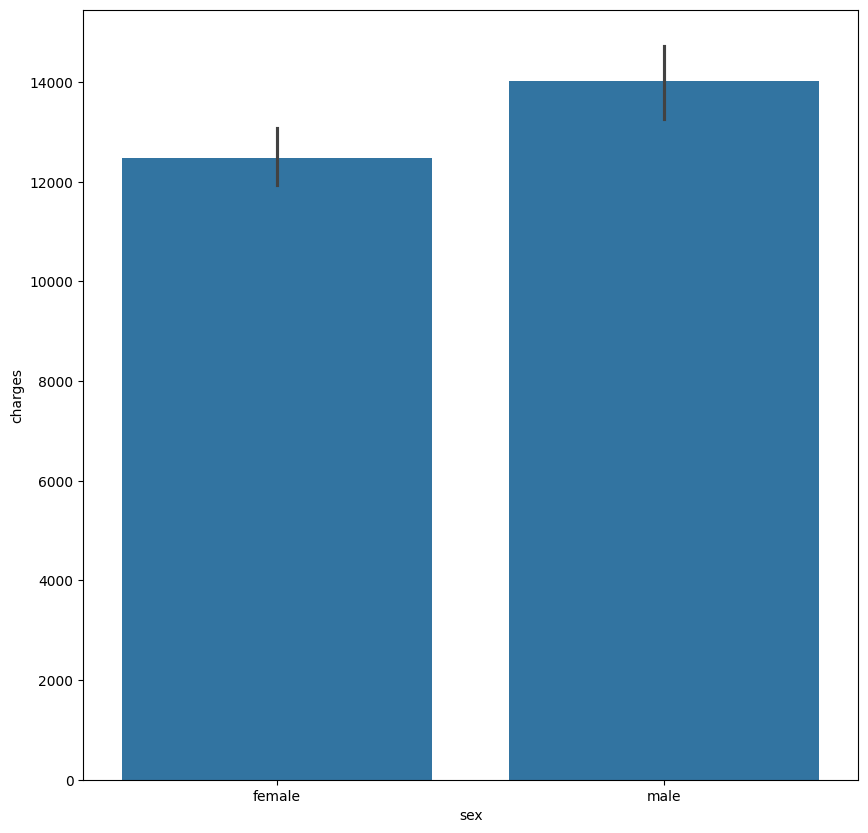

In [ ]:
plot = plt.figure(figsize=(10,10))
sns.barplot(x="sex", y="charges", data=df)

Encoding

for training

In [ ]:
df.replace({"sex":{"male": 0, "female": 1},
                 "smoker": {"yes":1, "no":0},
                 "region": {"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
scaler = StandardScaler()
df[['charges', 'age', 'bmi']] = scaler.fit_transform(df[['charges', 'age', 'bmi']])

In [ ]:
X = df.drop("charges", axis=1)
Y = df["charges"]

In [ ]:
# bins = [17,30,50,65,np.inf]
# labels = [0,1,2,3]

# X['Agegroup'] = pd.cut(X['age'],bins,labels=labels)
#X_test['Agegroup'] = pd.cut(X_test['age'],bins,labels=labels)

In [ ]:
# bins = [15.0,25.0,35.0,45.0,55.0,np.inf]
# labels = [0,1,2,3,4]

# X['BMIgroup'] = pd.cut(X['bmi'],bins,labels=labels)
#X_test['BMIgroup'] = pd.cut(X_test['bmi'],bins,labels=labels)

In [ ]:
#X = X.drop(columns = ["age", "bmi"], axis=1)

Split into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape, X.shape)

(2772,) (2217,) (555,) (2772, 6)


Model training: RFC

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
X_train_pred = model.predict(X_train)
mse = mean_squared_error(Y_train, X_train_pred)
print("Mean Squared Error (MSE): ", mse)
print("Error: ", np.sqrt(mse))

Mean Squared Error (MSE):  0.24668967155963195
Error:  0.49667864012823415
